# Predicting heart-disease using Machine Learning

### 1. Problem Statement
> Given clinical paramters about a patient can we predict if they have heart-disease or not.

### 2. Data
> https://www.kaggle.com/ronitf/heart-disease-uci

### 3. Evaluation
> If we can attain 95% accuracy while trying to find if patient has heart disease or not, then project can be pursued.

### 4. Features
> This is where we get information about different features
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
6. serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
7. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
8. restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
9. thalach - maximum heart rate achieved
10. exang - exercise induced angina (1 = yes; 0 = no)
11. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more
12. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
13. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
14. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
15. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### 5. Using Pandas, MatplotLib and Numpy for data analysis

In [268]:
# import all libs/tools we need
# EDA and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [269]:
### Load Data
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration or EDA
> Become more familiar with data

1. What questions to answer ?
2. What kinds of data and how to treat them ?
3. What's missing from data and how to deal ?
4. Where are the Outliers and how to deal with them ?
5. Add/Change/Remove features to get more out of data ?

In [270]:
df.shape

(303, 14)

In [271]:
# Find how many of each target class exist ?
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

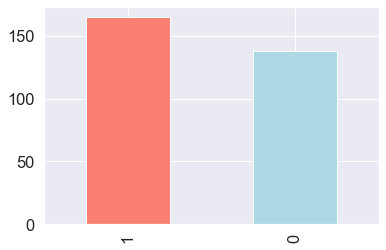

In [272]:
df.target.value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [273]:
# KInds of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [274]:
# Any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [275]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Find Patterns in Data

### Heart Disease frequency as per sex

In [276]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [277]:
# compare target with sex column
pd.crosstab(df.target, df.sex)

#### sex
# 1- male
# 0- female

sex,0,1
target,,
0,24,114
1,72,93


> It can be inferred that as per current data,
- about 75% of women have chance of heart disease
- about 45% of men have chance of heart disease
- when chosen at random -  there is a chance of 72% for heart-disease to be present

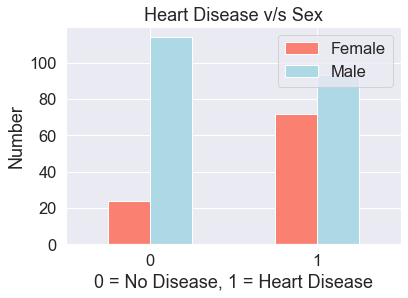

In [278]:
# plot to be COMMUNICATIVE
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                  color=['salmon','lightblue']);
plt.title('Heart Disease v/s Sex');
plt.xlabel('0 = No Disease, 1 = Heart Disease');
plt.ylabel('Number');
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [279]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [280]:
# Compare age, thalach and target
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart rate for Heart Disease



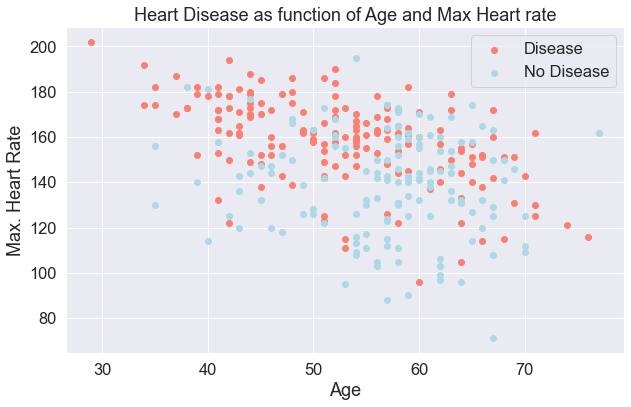

In [281]:
plt.figure(figsize=(10,6));

# positive examples
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           color='salmon');

# negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           color='lightblue');

plt.title('Heart Disease as function of Age and Max Heart rate');
plt.xlabel('Age');
plt.ylabel('Max. Heart Rate');
plt.legend(['Disease','No Disease']);

> It is evident that there is a downward trend. As age increases, heart rate decreases for all heart disease patients.

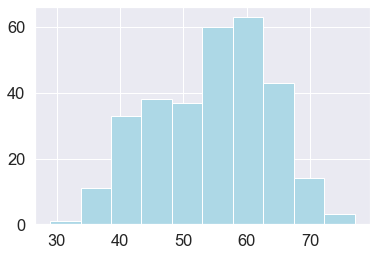

In [282]:
## Check Age distribution for given data
df.age.hist(color='lightblue');

In [283]:
# Consider Chest pain column - cp
df.cp.value_counts()

# 0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

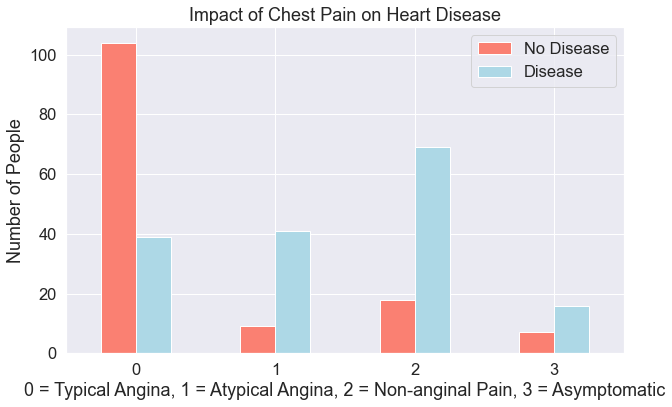

In [284]:
# Impact of chest pain on target/occurance of heart disease
pd.crosstab(df.cp,
           df.target).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue']);
plt.title('Impact of Chest Pain on Heart Disease');
plt.xlabel('0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic');
plt.xticks(rotation=0)
plt.ylabel('Number of People');
plt.legend(['No Disease', 'Disease']);

In [285]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Finding Correlation between independent variables

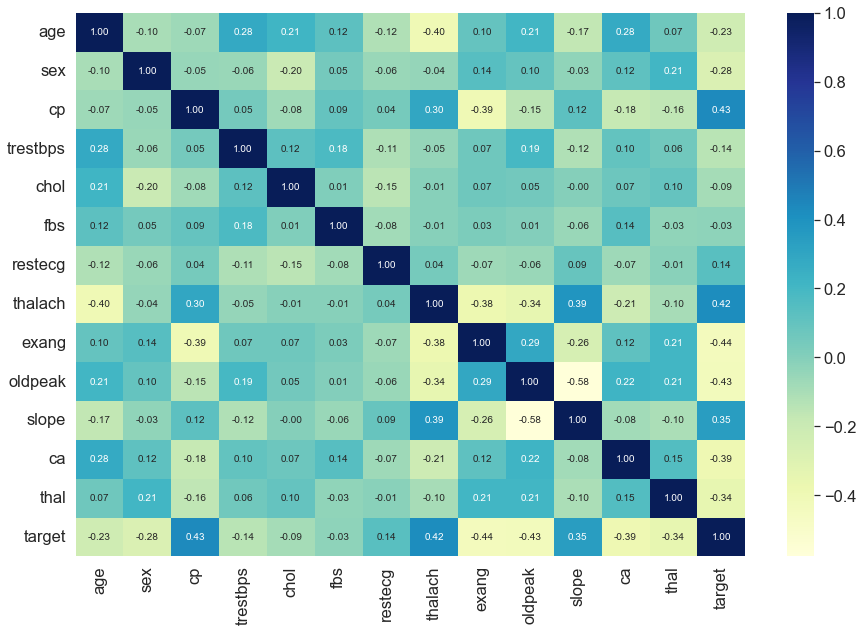

In [286]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 fmt='.2f',
                 cmap='YlGnBu');

> As `cp` goes up `target` value also increases ==> +ve correlation

> `exang` and `target` are -vely correlated

## 5. Modelling and Experimentation

In [287]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [288]:
# Split data into features and labels
X = df.drop(columns='target', axis=1)
y = df.target

In [289]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [290]:
X.shape

(303, 13)

In [291]:
# Split Data into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [292]:
len(X_train), len(X_test)

(227, 76)

#### Using cheat sheet to find correct/ probably correct model to use
> `https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html`

#### Going to try 3 different models
1. Logistic Regression
2. K-Nearest Neighbors
3. Ensemble - Random Forest

In [293]:
# Put models into a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Function to fit and evaluate a machine learning model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Evaluated a ML model onto data passed as parameter.
    models: a dictionary of different sklearn models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # set random seed for reproducibility
    np.random.seed(42)
    # make a dictionary to store model scores
    model_scores = {}
    # iterate through models to be evaluated
    for name, model in models.items():
        # fit model
        model.fit(X_train, y_train)
        # evaluate model and save scores into dictionary
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [294]:
# call function
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test= y_test)

In [295]:
print(model_scores)

{'Logistic Regression': 0.881578947368421, 'KNN': 0.6973684210526315, 'Random Forest': 0.8157894736842105}


### Model Comparison

In [296]:
model_accuracies = pd.DataFrame(model_scores, index=['accuracies'])

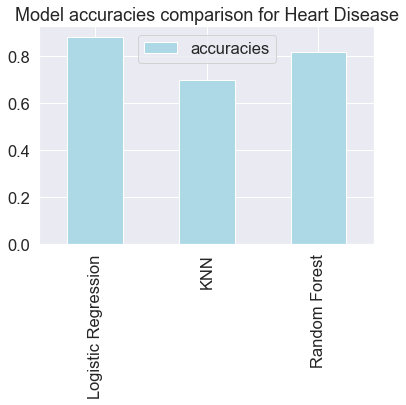

In [297]:
model_accuracies.T.plot(kind='bar', color='lightblue')
plt.title('Model accuracies comparison for Heart Disease');

After achieving the baseline models,
Next steps:
* Hyper parameter tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall 
* F1 Score
* Classification report
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter Tuning

In [298]:
# Tuning KNN

train_scores = []
test_scores = []

# create a list of different parameters for n_neighbors
neighbors = range(1,21,1)

knn = KNeighborsClassifier()

for n in neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on test data: 75.00%


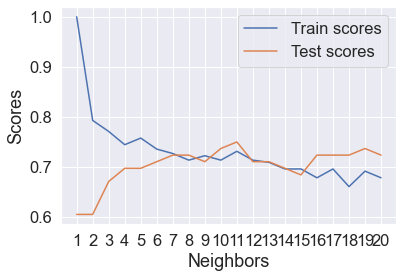

In [299]:
plt.plot(neighbors, train_scores, label='Train scores');
plt.plot(neighbors, test_scores, label='Test scores');
plt.xlabel('Neighbors');
plt.xticks(range(1,21,1))
plt.ylabel('Scores');
plt.legend();
print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

> Even after hyper parameter tuning KNN doesn't give better score when compared to Logistic Regression or Random Forest. Hence, `neglecting KNN from this moment` onwards.

### Hyperparameter Tuning (using RandomizedSearchCV)
* Sklearn documentation always suggests to use a range of values for better performance

In [300]:
# Hyperparameter grid for Logistic Regression Model
log_reg_params = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

# Hyperparameter grid for Random Forest Classifier
rf_params = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [301]:
# Performing RandomizedSearchCV on both models
# Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions=log_reg_params,
                               cv=5,
                               n_iter=20,
                               verbose=True)

In [302]:
# Fit Model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [303]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [304]:
rs_log_reg.score(X_test, y_test)

0.8947368421052632

In [305]:
# Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_params,
                          cv=5,
                          n_iter=20,
                          verbose=True)

In [306]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [307]:
rs_rf.best_params_

{'n_estimators': 810,
 'min_samples_split': 8,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [308]:
rs_rf.score(X_test, y_test)

0.8421052631578947

### It is clear that accuracy for both Logistic Regression and Random Forest Classifier got improved when, GridSearchCV is applied.
> Since, Logistic Regression is giving better accuracy after Hyper paramter tuning using RandomizedSearchCV,
`Random Forest Classifier can be neglected.`

### Hyperparamter Tuning (using GridSearchCV)




In [309]:
log_reg_params = {
    'C': np.logspace(-4, 4, 30),
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear', ]
}

In [310]:
# Setup grid
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_params,
                         cv=5,
                         verbose=True)

In [311]:
# fit model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             verbose=True)

In [312]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'newton-cg'}

In [313]:
gs_log_reg.score(X_test, y_test)

0.8947368421052632

#### ROC curve & AUC metric

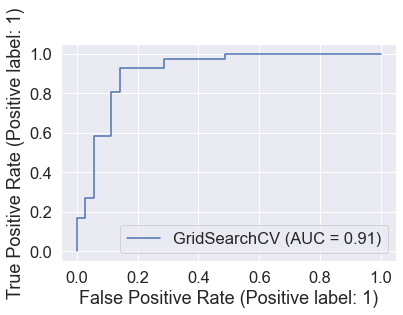

In [314]:
plot_roc_curve(gs_log_reg,
              X_test,
              y_test);

In [315]:
# generate predictions
y_preds = gs_log_reg.predict(X_test)

#### Confusion Matrix



In [316]:
confusion_matrix(y_test, y_preds)

array([[30,  5],
       [ 3, 38]])

In [317]:
def plot_conf_mat(y_test, y_preds):
    """
    y_test: test labels
    y_preds: predicted labels
    """
    sns.set(font_scale=1.5)
    conf_mat = confusion_matrix(y_test, y_preds)
    sns.heatmap(conf_mat,
                annot=True,
                cmap=None)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')

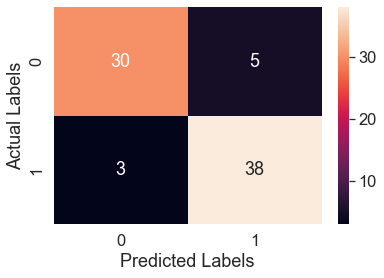

In [318]:
plot_conf_mat(y_test=y_test, y_preds=y_preds)

#### Classification Report

In [319]:
print(classification_report(y_test, y_preds))

# these metrics only calculated on one set of train-test data

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



#### Precision, Recall and F1-score w.r.t. Cross Validation

In [320]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'newton-cg'}

In [321]:
# New classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                        solver= 'liblinear')

In [322]:
# cross-validated accuracy

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [323]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [324]:
# cross-validated precision

cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [325]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [326]:
# cross-validated recall

cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [327]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [328]:
# cross-validated f1-score

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [329]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [330]:
# Comparison of Cross-validation evaluation metrics

cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1-Score': cv_f1
}, index = [0])

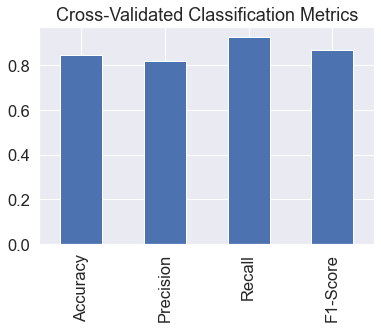

In [331]:
cv_metrics.T.plot(kind='bar',
                  title='Cross-Validated Classification Metrics',
                  legend=False);

### Feature Importance

> Which features contributed most to the outcome of model?

> How did they contribute ?

Finding `FEATURE IMPORTANCE` is different for each Machine Learning model.

In [332]:
# Fit an instace of Logistic regression

clf = LogisticRegression(C= 0.20433597178569418,
                        solver= 'liblinear')

clf.fit(X_test, y_test)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [333]:
# Check Feature importance, coefficients
clf.coef_

array([[ 0.03169893, -0.41881525,  0.67747373, -0.04854223, -0.00824989,
        -0.17472022,  0.04738078,  0.05634213, -0.18543924, -0.3066911 ,
        -0.20040406, -0.45311549, -0.25912525]])

In [334]:
# Map each coefficient to feature name
feature_importances = dict(zip(df.columns,list(clf.coef_[0])))

In [335]:
feature_importances

{'age': 0.03169893172713173,
 'sex': -0.418815246004026,
 'cp': 0.6774737293287547,
 'trestbps': -0.04854223080429326,
 'chol': -0.008249889367008075,
 'fbs': -0.17472021506215704,
 'restecg': 0.047380782153931864,
 'thalach': 0.05634212688876278,
 'exang': -0.18543923569002635,
 'oldpeak': -0.3066910990192247,
 'slope': -0.20040405506911363,
 'ca': -0.45311549263928963,
 'thal': -0.2591252485574166}

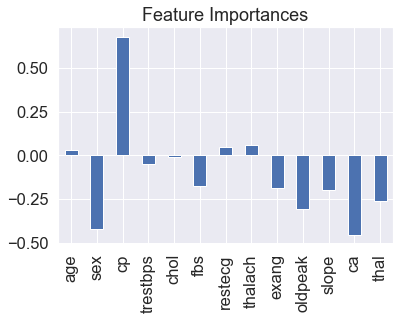

In [336]:
# Visualize feature importance
feature_imp_df = pd.DataFrame(feature_importances, index=[0])
feature_imp_df.T.plot(kind='bar',
                      title='Feature Importances',
                   legend=False);

In [337]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


## Final Thoughts

If the evaluation metric hasn't been achieved yet....
What else can be done ?
* Could collect more data?
* Could try a better model ?
* Could improve the current model more ?
* If model is good enough (and you have achieved evaluation metric goals), how to export model and share with others ?

